# Generate noisy signal

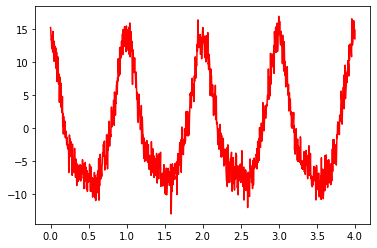

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate clean data
t = np.linspace(0, 4, 1000)
frequencies = [1, 2, 3, 4]
amplitudes = [10, 3, 1, 0.2]
phases = [0, 0.2, -0.3, 0.5]
y = 0 * t
for f, A, phi in zip(frequencies, amplitudes, phases):
    w = 2*np.pi*f
    y += A * np.cos(w*t + phi)

# Add measurement noise
noise = 1.5 * np.random.randn(*y.shape)
y = y + noise

# Plot noisy signal
plt.plot(t, y, 'r', label='Noisy Data')
plt.show()

# Perform FFT analysis

In [13]:
# Compute FFT magnitude & phase
Y = np.fft.fft(y)
Hz = np.fft.fftfreq(len(t), t[1] - t[0])
mid = int(len(y)/2)
Y, Hz = Y[:mid], Hz[:mid] # keep only positive frequencies
magnitude, phase = np.abs(Y) * 2 / len(y), np.angle(Y)

Plot results

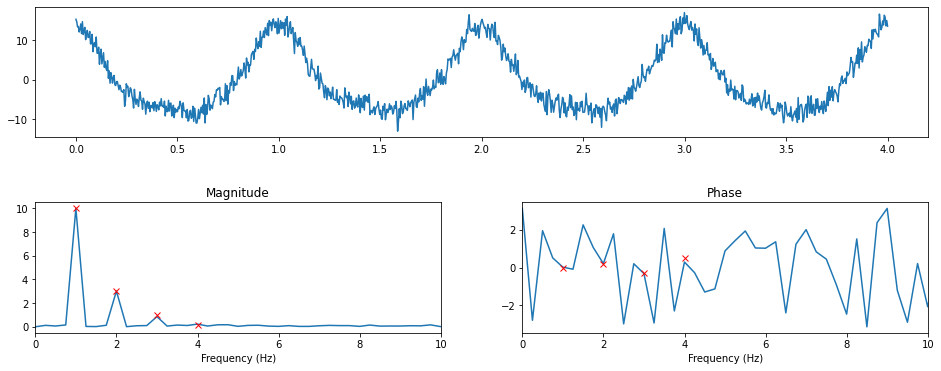

In [14]:
fig = plt.figure(figsize=(16, 6))

# Plot signal
plt.subplot(2, 1, 1);plt.plot(t, y)

# Plot FFT Magnitude
plt.subplot(2, 2, 3)
plt.plot(Hz, magnitude)
for f, A in zip(frequencies, amplitudes):
    plt.plot(f, A, 'rx')
plt.title('Magnitude')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')

# Plot FFT Phase
plt.subplot(2, 2, 4)
plt.plot(Hz, phase)
for f, phi in zip(frequencies, phases):
    plt.plot(f, phi, 'rx')
plt.title('Phase')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')

# Adjust spacing between subplots and show plots
plt.subplots_adjust(hspace=0.5)
plt.show()

# CHALLENGE TO STUDENT

1. How can you filter your noisy data for a better FFT estimate?

2. Collect real audio data and plot its Fourier Transform (using FFT).